<a href="https://colab.research.google.com/github/Arnav613Gupta/machine_learning/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

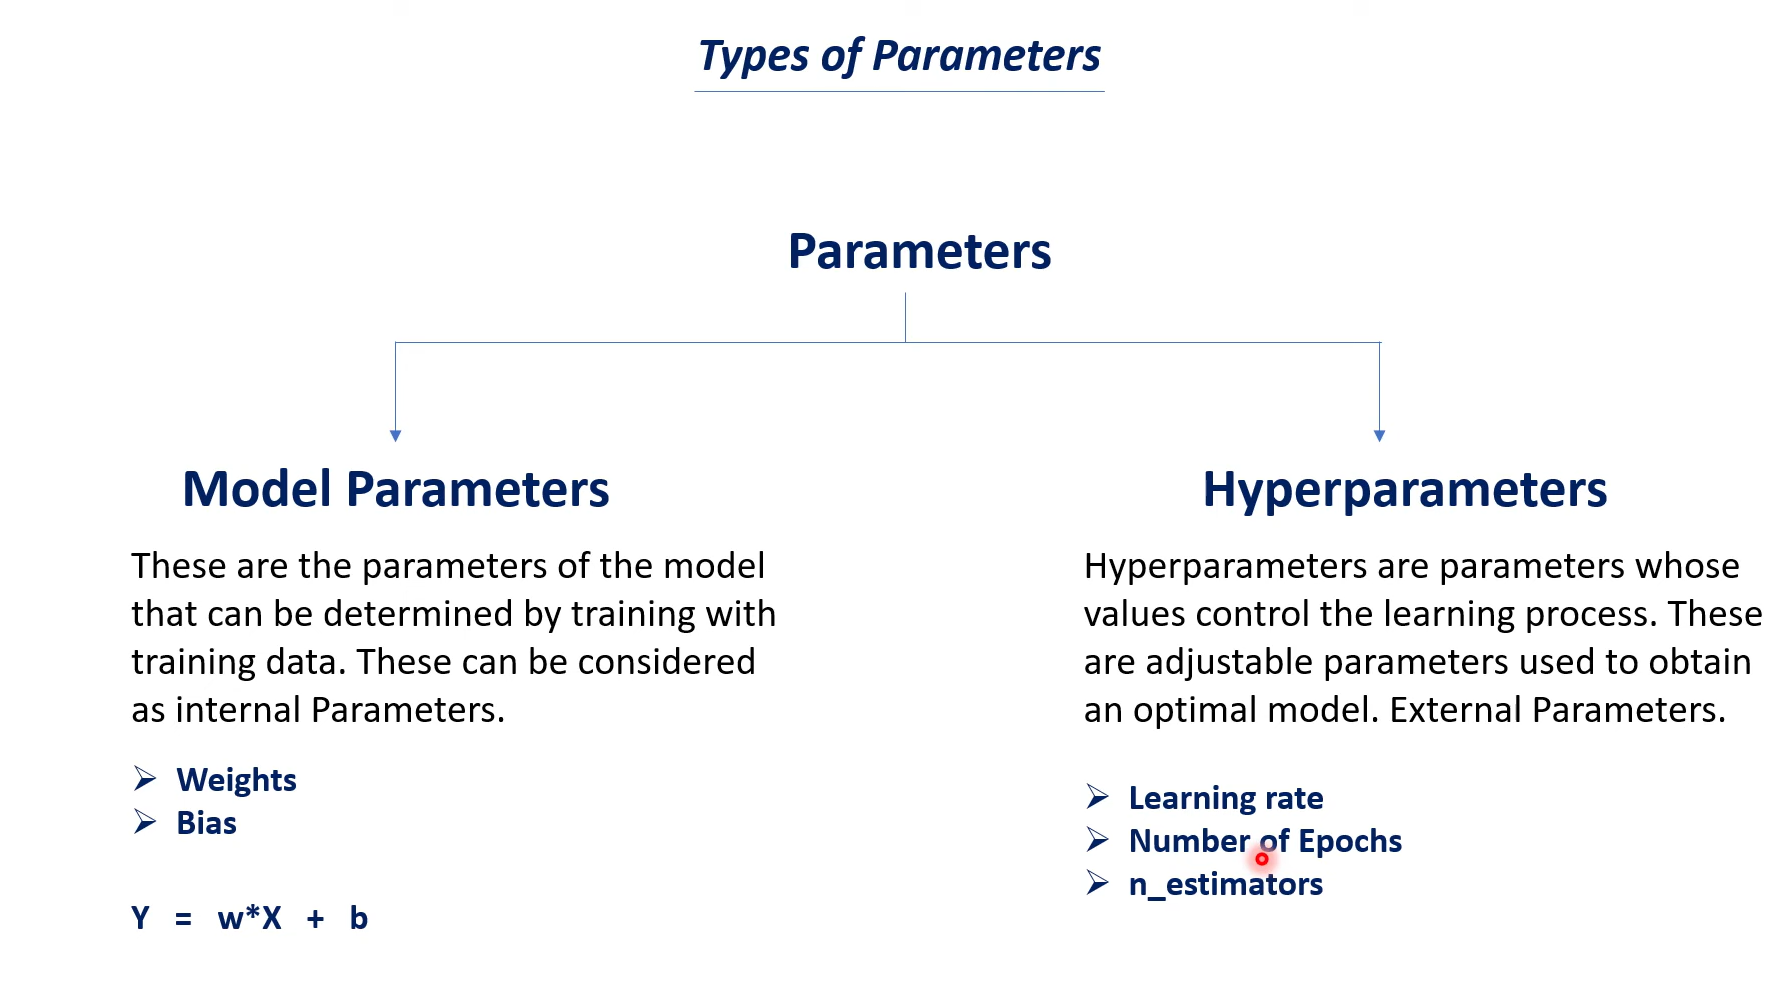

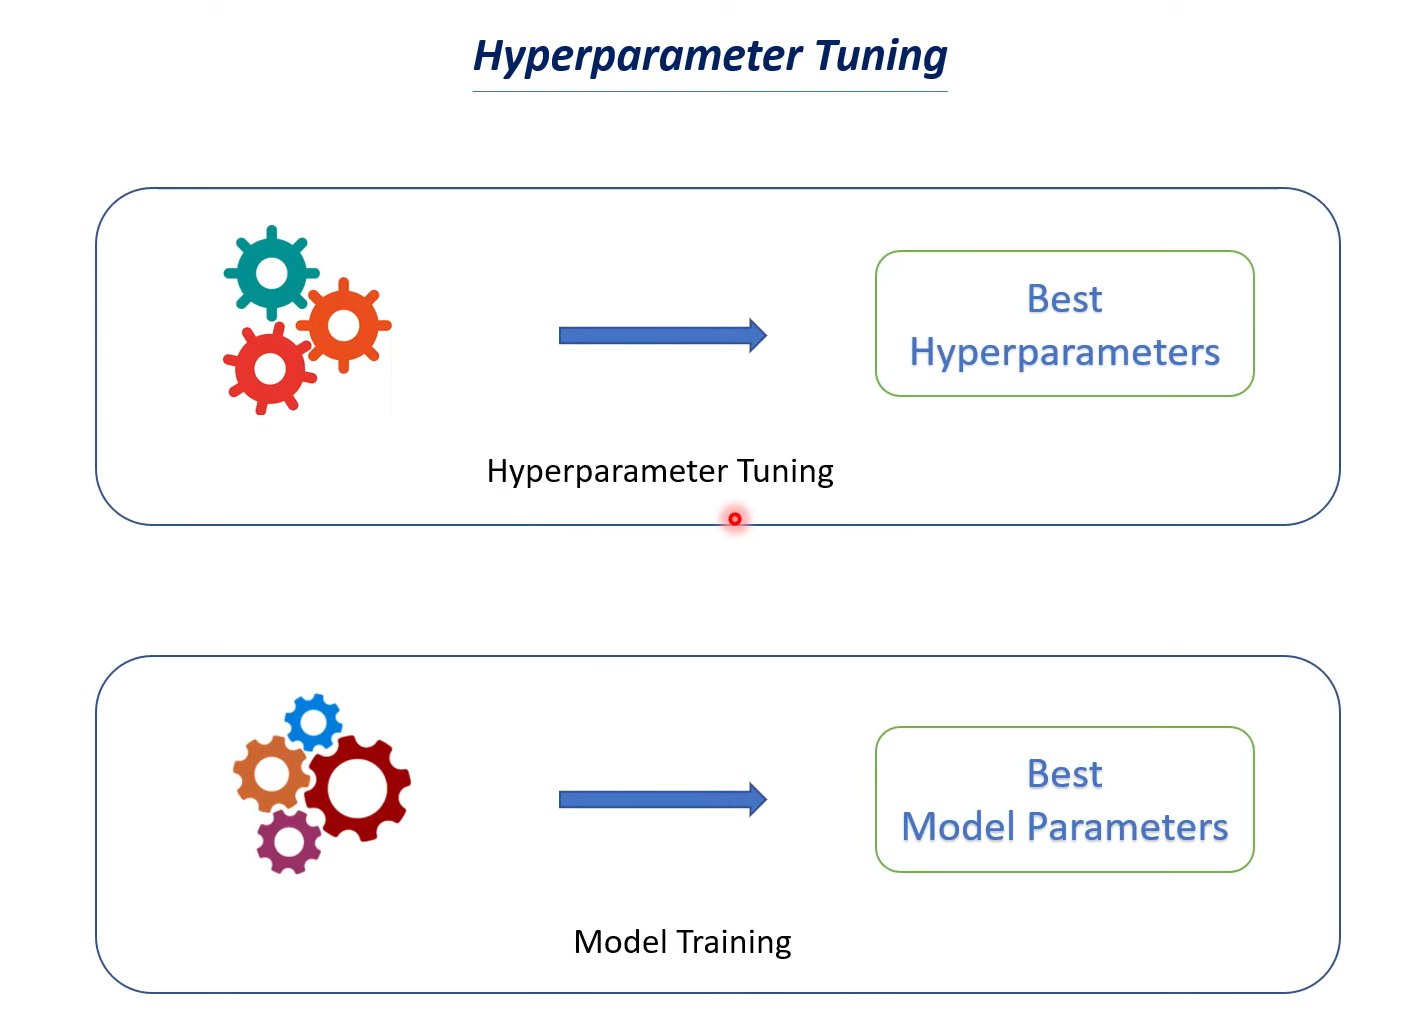

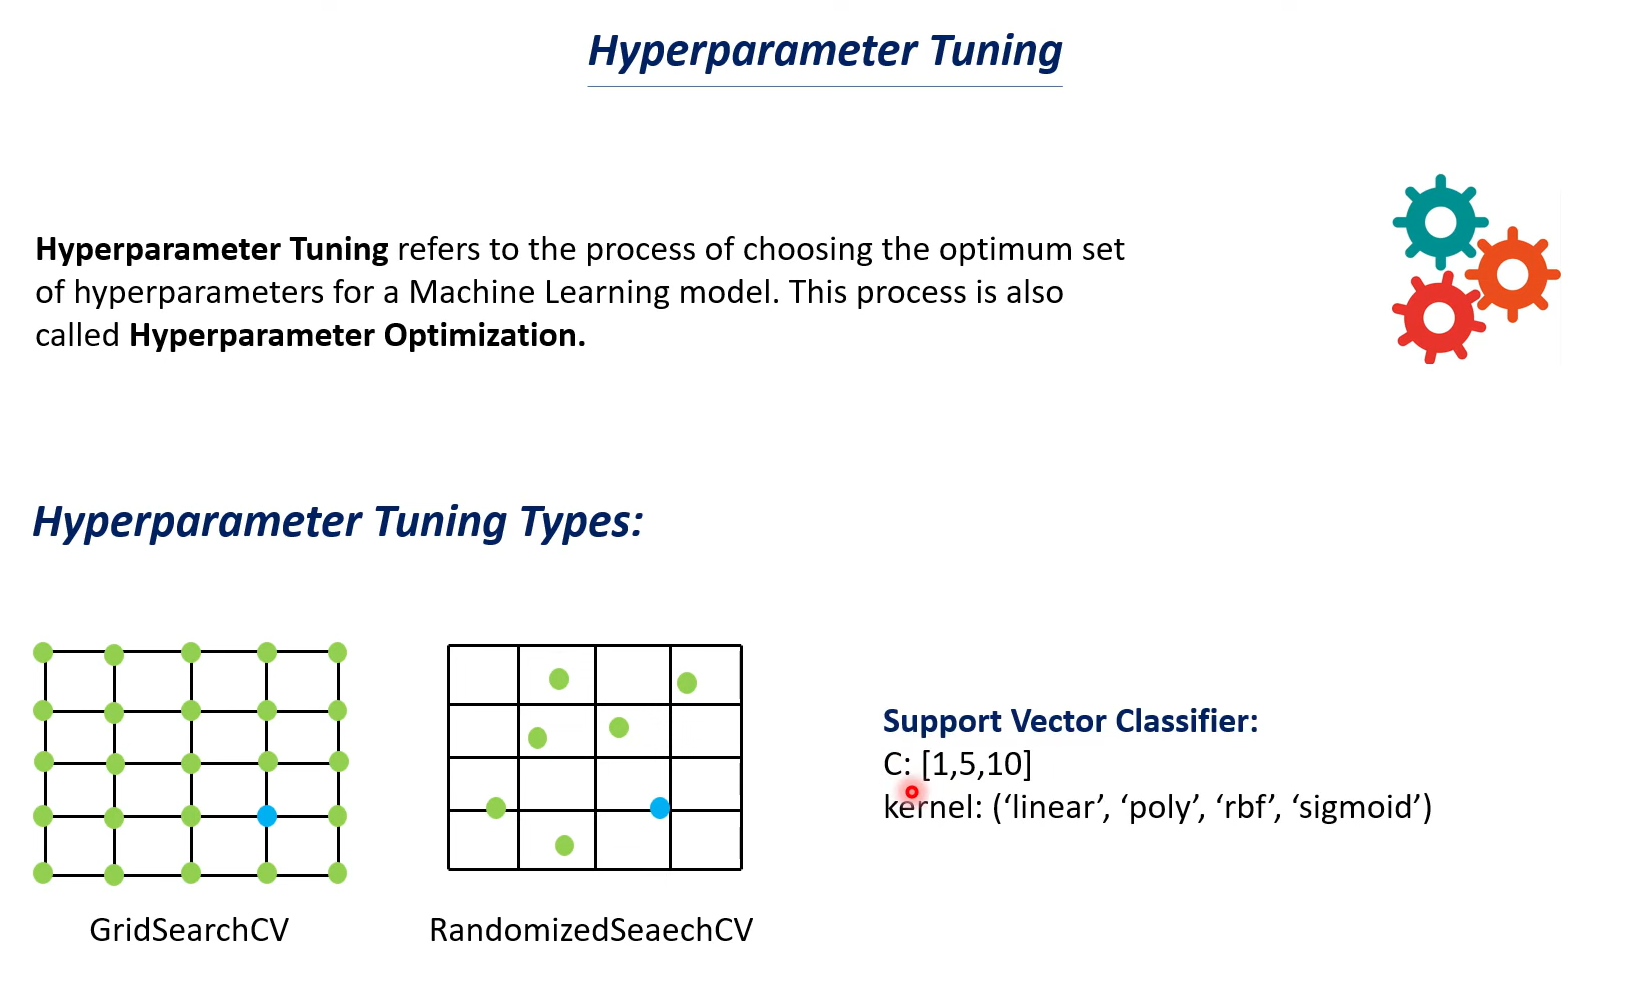

#Hyper-Parameter Tuning

In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# importing data
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#loading data to data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding target to dataframe
data_frame["label"] = breast_cancer_dataset.target
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data_frame["label"].value_counts()

,count
label,
1,357
0,212


In [ ]:
X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame["label"]

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X = np.asarray(X)
Y = np.asarray(Y)

#**Grid Search CV**

used to find best parameter for our model

In [ ]:
model = SVC()

In [ ]:
#hyperparameters

parameter = {
    "kernel" :['linear','poly', 'rbf', 'sigmoid'],
    "C" : [1,5,10,20]
}

In [ ]:
#grid search
classifier = GridSearchCV(model, parameter, cv = 5)

In [ ]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([1.71107154e+00, 4.06785011e-03, 4.67510223e-03, 1.54652596e-02,
        3.10604420e+00, 4.19077873e-03, 4.33797836e-03, 1.39193535e-02,
        4.70572729e+00, 4.44865227e-03, 4.14428711e-03, 1.36904240e-02,
        9.51280432e+00, 7.69152641e-03, 6.73623085e-03, 2.14834690e-02]),
 'std_fit_time': array([5.24099933e-01, 1.91584922e-04, 8.32463179e-05, 8.95465816e-04,
        7.69054269e-01, 3.54496426e-04, 1.71375328e-04, 4.62492223e-04,
        8.81170970e-01, 1.26933120e-04, 9.24130342e-05, 7.11097558e-04,
        5.76472198e+00, 2.13074491e-04, 3.88735901e-04, 9.26829445e-04]),
 'mean_score_time': array([0.00142846, 0.00135894, 0.0018856 , 0.00405679, 0.00126967,
        0.00130758, 0.00183258, 0.00382242, 0.00142369, 0.0013236 ,
        0.00164356, 0.00353932, 0.00137458, 0.00197864, 0.00253234,
        0.00519996]),
 'std_score_time': array([1.62615636e-04, 3.96719919e-05, 4.09531781e-05, 1.75126819e-04,
        4.50687049e-05, 4.08286787e-05, 1.74904533e-

In [ ]:
#best parameters
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [ ]:
#highest accuracy
print(classifier.best_score_)

0.9525694767893185


In [ ]:
results = pd.DataFrame(classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.711072,0.524100,0.001428,0.000163,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.004068,0.000192,0.001359,0.000040,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004675,0.000083,0.001886,0.000041,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.015465,0.000895,0.004057,0.000175,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,3.106044,0.769054,0.001270,0.000045,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [ ]:
grid_seearch_result = results[["param_C", "param_kernel", "mean_test_score"]]
print(grid_seearch_result)

    param_C param_kernel  mean_test_score
0         1       linear         0.945536
1         1         poly         0.908663
2         1          rbf         0.912172
3         1      sigmoid         0.460441
4         5       linear         0.950815
5         5         poly         0.922729
6         5          rbf         0.931501
7         5      sigmoid         0.411178
8        10       linear         0.952569
9        10         poly         0.920975
10       10          rbf         0.922714
11       10      sigmoid         0.402391
12       20       linear         0.949061
13       20         poly         0.919221
14       20          rbf         0.920944
15       20      sigmoid         0.398867


Highest Accuracy = 95.2%

Best Params ={ c :10, 'kernel': 'linear'}

#**RandomizedSearchCV**

In [ ]:
model = SVC()

In [ ]:
#hyperparameters

parameter = {
    "kernel" :['linear','poly', 'rbf', 'sigmoid'],
    "C" : [1,5,10,20]
}

In [ ]:
#random search
random_classifier = RandomizedSearchCV(model, parameter, cv = 5)

In [ ]:
random_classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
#best parameters
best_parameters = random_classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [ ]:
#highest accuracy
print(random_classifier.best_score_)

0.9525694767893185


In [ ]:
results = pd.DataFrame(random_classifier.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005361,0.000838,0.001494,0.000025,poly,20,"{'kernel': 'poly', 'C': 20}",0.877193,0.921053,0.903509,0.938596,0.955752,0.919221,0.027300,8
1,5.572942,1.245520,0.001323,0.000095,linear,10,"{'kernel': 'linear', 'C': 10}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
2,0.004931,0.000419,0.001889,0.000056,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.877193,0.921053,0.921053,0.947368,0.938053,0.920944,0.024105,7
3,0.005272,0.000798,0.001572,0.000147,poly,10,"{'kernel': 'poly', 'C': 10}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,6
4,3.550553,1.305471,0.001402,0.000183,linear,5,"{'kernel': 'linear', 'C': 5}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [ ]:
randomized_seearch_result = results[["param_C", "param_kernel", "mean_test_score"]]
print(randomized_seearch_result)

   param_C param_kernel  mean_test_score
0       20         poly         0.919221
1       10       linear         0.952569
2       20          rbf         0.920944
3       10         poly         0.920975
4        5       linear         0.950815
5       20      sigmoid         0.398867
6       10          rbf         0.922714
7        5         poly         0.922729
8       20       linear         0.949061
9        1         poly         0.908663


Highest Accuracy = 95.2%

Best Params ={ c :10, 'kernel': 'linear'}